# Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leemos el dataset

In [53]:
df = pd.read_csv('../data/train.csv')

# Análisis

Primero podemos usar .info para tener una idea general del dataset

In [54]:
df.info()
#for c in df.columns:
    #print(f"---- {c} ---")
    #print(df[c].value_counts())

#df[df["banos"]==2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

Con value_counts() podemos ver la distribución de valores que toma una columna en particular

In [8]:
df['ciudad'].value_counts()

Querétaro                12646
Benito Juárez            11014
Zapopan                  10360
San Luis Potosí           7925
Mérida                    7162
                         ...  
Tocumbo                      1
Santa Ana Nopalucan          1
San Salvador el Verde        1
Ciudad Ixtepec               1
Tlaquiltenango               1
Name: ciudad, Length: 875, dtype: int64

Si la columna tiene un valor númerico puede ser interesante ver su histograma con la función hist()

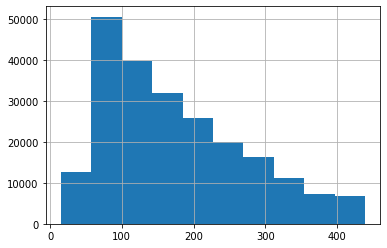

In [6]:
df['metroscubiertos'].hist()

Otra posibilidad al ser valores numéricos es ver su distribución mediante la función describe(). Como parámetro acepta que le pasemos todos los percentiles que queremos ver.

In [7]:
df['metroscubiertos'].describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

En pandas es simple filtrar el dataset por el valor del alguna columna. 
Igualar una columna a un valor (df['ciudad']=='Mérida'), nos devuelve una serie de booleanos que sirven para indexar el dataset. También podemos filtrar filas en base a otros criterios, como tirar las que tienen valores "NaN" con la función dropna()

In [8]:
df['ciudad']=='Querétaro'

0         False
1         False
2         False
3         False
4         False
          ...  
239995    False
239996    False
239997    False
239998    False
239999    False
Name: ciudad, Length: 240000, dtype: bool

In [60]:
df_city = df[df['ciudad']=='Querétaro'].dropna()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.0,3.0,2.0,...,83666.0,20.682878,-100.317503,2013-08-12 00:00:00,0.0,1.0,0.0,1.0,1.0,1500000.0
16,283945,preciosa casa en cumbres del lago \t,<p>clave: vcln2450 fecha de actualizaci&oacute...,Casa,"CUMBRES DEL LAGO JURIQUILLA, QUERETARO, MEXICO",Querétaro,Querétaro,0.0,3.0,2.0,...,84338.0,20.708760,-100.459303,2013-03-06 00:00:00,0.0,0.0,0.0,1.0,1.0,2450000.0
82,18684,oportunidad unica el refugio 3 rec con vestido...,hermosas y unicas residencias nuevas en el ref...,Casa en condominio,RESIDENCIAL DIAMANTE,Querétaro,Querétaro,0.0,3.0,2.0,...,84028.0,20.646004,-100.352765,2015-08-21 00:00:00,0.0,1.0,1.0,1.0,1.0,1300000.0
175,203002,casa estilo minimalista,"<p>residencia con excelentes acabados, estilo ...",Casa,PASEO LOMA DE QUERÉTARO #95,Querétaro,Querétaro,5.0,3.0,3.0,...,83673.0,20.593145,-100.362292,2014-07-22 00:00:00,0.0,0.0,0.0,1.0,1.0,3500000.0
388,132142,casa en venta en bosques del acueducto querétaro,<p>esta casa se encuentra en una excelente ubi...,Casa,Bosques del Acueducto,Querétaro,Querétaro,0.0,3.0,3.0,...,83626.0,20.596365,-100.374940,2013-11-05 00:00:00,0.0,1.0,0.0,1.0,1.0,3500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239423,114065,estrena hermosa casa en el refugio con alta ca...,"hermosa casa ubicada en el refugio, uno de los...",Casa,Residencial El Refugio,Querétaro,Querétaro,0.0,3.0,2.0,...,84028.0,20.649203,-100.346458,2015-10-08 00:00:00,1.0,0.0,1.0,1.0,1.0,1250000.0
239453,86188,venta casa en real de juriquilla,"3 recamaras ppl con vestidor y baño, sala come...",Casa,REAL DE JURIQUILLA,Querétaro,Querétaro,0.0,3.0,2.0,...,84312.0,20.743773,-100.469828,2016-12-21 00:00:00,0.0,0.0,0.0,0.0,0.0,2600000.0
239711,115294,casa en real de juriquilla,<p>casa seminueva de dos pisos en real de juri...,Casa,Salto de Eyipantla 137.,Querétaro,Querétaro,5.0,3.0,3.0,...,83888.0,20.588670,-100.415540,2012-11-15 00:00:00,0.0,0.0,0.0,1.0,1.0,2700000.0
239766,4499,queretaro residencial el parque (por mirador) ...,"residencial el parque (por mirador), queretaro...",Casa en condominio,Condominio Eucaliptos,Querétaro,Querétaro,4.0,2.0,2.0,...,84088.0,20.584294,-100.335858,2015-10-24 00:00:00,0.0,0.0,0.0,1.0,1.0,890000.0


Para ver la relación entre algunas variables puede ser útil realizar un primer gráfico. Pandas tiene sus funciones para graficar basadas en matplotlib. Existen otras librerías como Seaborn que, si bien también está basada sobre matplotlib, da algunas funcionalidades más.

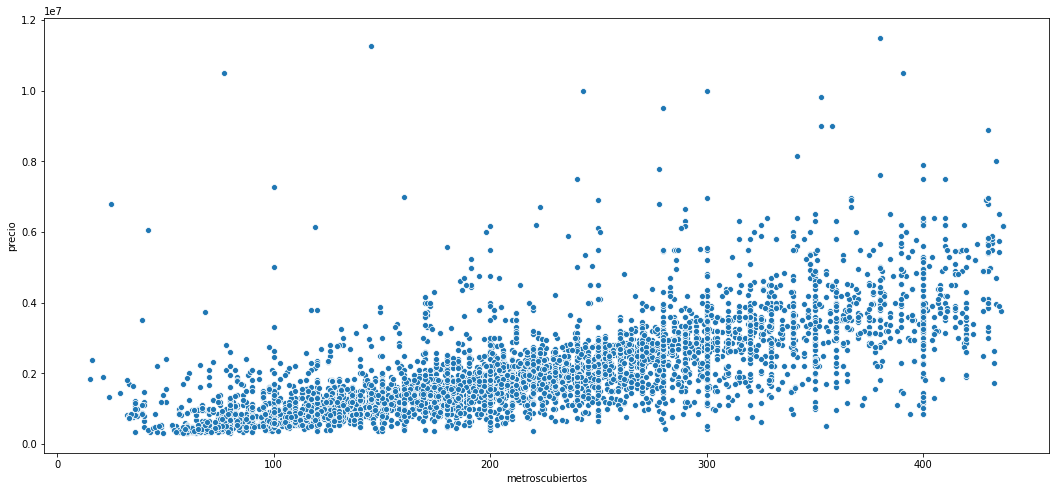

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.scatterplot(data=df[df["ciudad"] == "Mérida"], x='metroscubiertos', y='precio')

En pandas es muy simple agregar una nueva columna con un valor calculado a partir de las otras. Por ejemplo, nuestro inmuebles serán "copados para ejercitar" si tiene gimnasio y pileta.

In [12]:
df['copado para ejercitar'] = (df['piscina']>0) & (df['gimnasio']>0) 

In [13]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'copado para ejercitar'],
      dtype='object')

In [13]:
df['copado para ejercitar'].value_counts()

False    232634
True       7366
Name: copado para ejercitar, dtype: int64

Más allá de que podemos segmentar utilizando filtros, a veces queremos realizar una acción para cada una de las segmentaciones posibles. Esto lo podemos lograr con la función groupby() que agrupa los valores y luego no deja aplicar una función sobre el grupo.

In [14]:
df.groupby('tipodepropiedad')['copado para ejercitar'].mean()

tipodepropiedad
Apartamento                      0.085890
Bodega comercial                 0.000000
Casa                             0.012581
Casa en condominio               0.032855
Casa uso de suelo                0.000000
Departamento Compartido          0.163121
Duplex                           0.000000
Edificio                         0.000000
Garage                           0.000000
Hospedaje                        0.000000
Huerta                           0.000000
Inmuebles productivos urbanos    0.000000
Local Comercial                  0.000000
Local en centro comercial        0.000000
Lote                             0.000000
Nave industrial                  0.000000
Oficina comercial                0.000574
Otros                            0.000000
Quinta Vacacional                0.000000
Rancho                           0.000000
Terreno                          0.000000
Terreno comercial                0.000000
Terreno industrial               0.000000
Villa             